<a href="https://colab.research.google.com/github/ajeet966/codsoft-project/blob/main/MOVIES_GENERIC_PREDICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NaN values in y_train: 62
NaN values in y_test: 19
Naive Bayes Classifier:
              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         3
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         4
        33.0       0.00      0.00      0.00         4
        34.0       0.00      0.00      0.00         3
        35.0       0.00      0.00      0.00         5
        36.0       0.00      0.00      0.00         5
        37.0       0.00      0.00      0.00         1
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


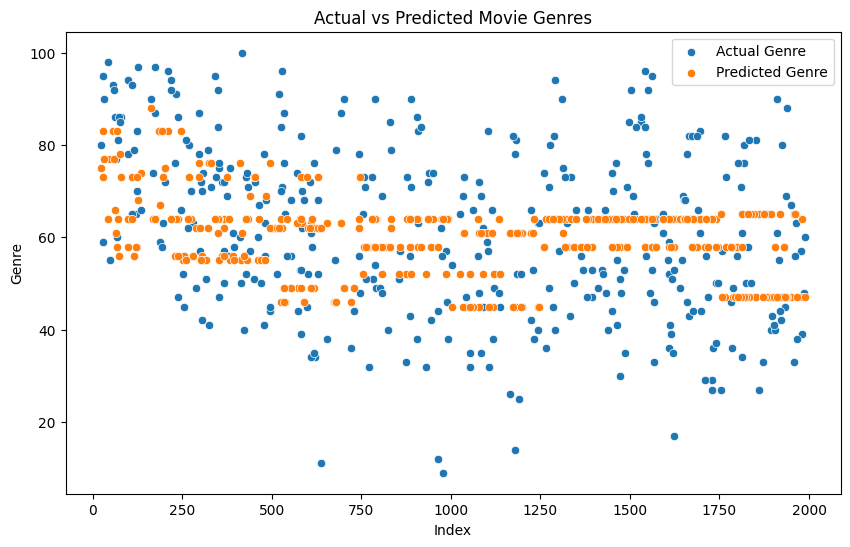

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib

# Load dataset
# Assuming the dataset has columns 'plot' and 'genre'
data = pd.read_csv('/content/imdb_top_2000_movies.csv')

# Display the first few rows of the dataset
data.head()

# Preprocess and split data
X = data.iloc[:, 1]  # Plot as input
y = data.iloc[:, 4]  # Genre as target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values in y_train and y_test
print("NaN values in y_train:", y_train.isna().sum())
print("NaN values in y_test:", y_test.isna().sum())

# Remove rows with NaN values in y_train
non_nan_train_indices = y_train.dropna().index
X_train = X_train.loc[non_nan_train_indices]
y_train = y_train.dropna()

# Remove rows with NaN values in y_test
non_nan_test_indices = y_test.dropna().index
X_test = X_test.loc[non_nan_test_indices]
y_test = y_test.dropna()

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict the genres for the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the Naive Bayes classifier
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is imported for plotting


# Plotting actual vs predicted genres
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label='Actual Genre')
sns.scatterplot(x=y_test.index, y=y_pred_nb, label='Predicted Genre')
plt.title('Actual vs Predicted Movie Genres')
plt.xlabel('Index')
plt.ylabel('Genre')
plt.legend()
plt.show()


Logistic Regression Classifier:
              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         3
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         4
        33.0       0.00      0.00      0.00         4
        34.0       0.00      0.00      0.00         3
        35.0       0.00      0.00      0.00         5
        36.0       0.00      0.00      0.00         5
        37.0       0.00      0.00      0.00         1
        38.0       0.07      0.17      0.10      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine Classifier:
              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         3
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         4
        33.0       0.00      0.00      0.00         4
        34.0       0.00      0.00      0.00         3
        35.0       0.00      0.00      0.00         5
        36.0       0.00      0.00      0.00         5
        37.0       0.00      0.00      0.00         1
        38.0       0.07      0.17      0.10   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

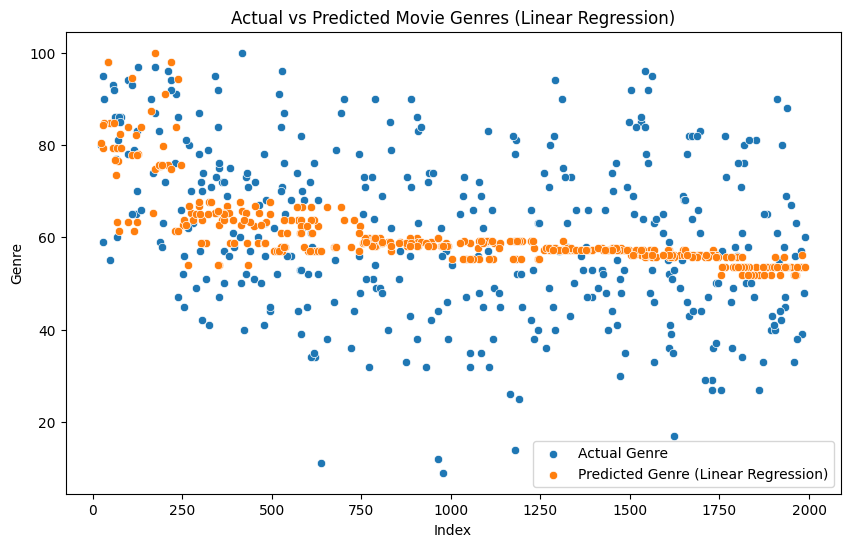

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_tfidf, X_test_tfidf, y_train, y_test, tfidf_vectorizer are defined

# Initialize and train the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)

# Predict the genres for the test set
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Evaluate the Logistic Regression classifier
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_lr))

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict the genres for the test set
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM classifier
print("Support Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svm))

# Initialize and train the Linear Regression model
linreg_model = LinearRegression()
linreg_model.fit(X_train_tfidf, y_train)  # Assuming X_train_tfidf is appropriate for regression

# Predict the genres for the test set using Linear Regression
y_pred_linreg = linreg_model.predict(X_test_tfidf)

# Optionally, you can evaluate Linear Regression (not classification report, but regression metrics)
# print("Linear Regression Model:")
# print("Insert regression evaluation here if needed")

# Save the trained model (assuming SVM performed the best)
best_model = svm_classifier
joblib.dump(best_model, 'movie_genre_predictor.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')




# Optionally, plot actual vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label='Actual Genre')
sns.scatterplot(x=y_test.index, y=y_pred_linreg, label='Predicted Genre (Linear Regression)')
plt.title('Actual vs Predicted Movie Genres (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Genre')
plt.legend()
plt.show()


Support Vector Machine Classifier:
              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         3
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         4
        33.0       0.00      0.00      0.00         4
        34.0       0.00      0.00      0.00         3
        35.0       0.00      0.00      0.00         5
        36.0       0.00      0.00      0.00         5
        37.0       0.00      0.00      0.00         1
        38.0       0.07      0.17      0.10   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

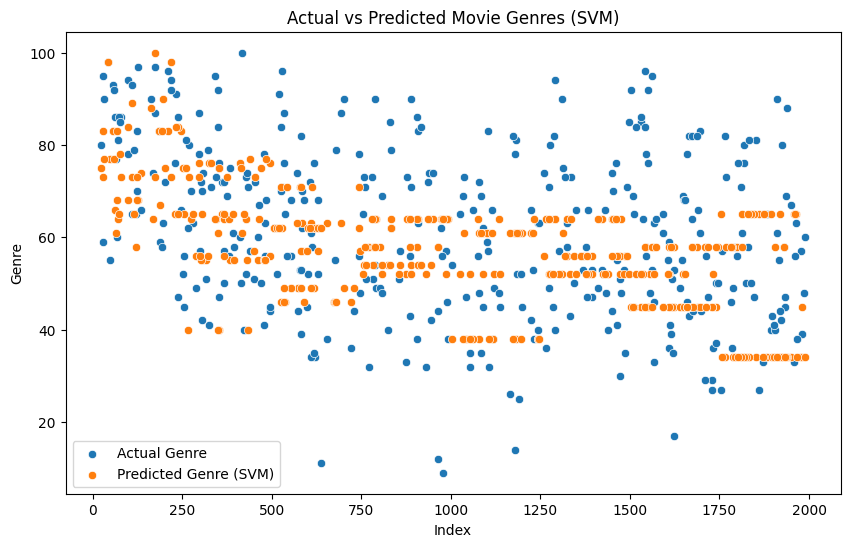

In [ ]:
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict the genres for the test set
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM classifier
print("Support Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svm))

# Save the trained model
best_model = svm_classifier  # Assume SVM performed the best
joblib.dump(best_model, 'movie_genre_predictor.pkl')

# Save the TF-IDF vectorizer
vectorizer_filename = 'tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, vectorizer_filename)
print(f"Saved TF-IDF vectorizer as {vectorizer_filename}")

# Plotting actual vs predicted genres
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label='Actual Genre')
sns.scatterplot(x=y_test.index, y=y_pred_svm, label='Predicted Genre (SVM)')

plt.title('Actual vs Predicted Movie Genres (SVM)')
plt.xlabel('Index')
plt.ylabel('Genre')
plt.legend()
plt.show()

In [ ]:
# Load the saved model and vectorizer
loaded_model = joblib.load('movie_genre_predictor.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Predict the genre for a new plot summary
new_plot = ["A young boy discovers he has magical powers and attends a school for wizards."]
new_plot_tfidf = loaded_vectorizer.transform(new_plot)
predicted_genre = loaded_model.predict(new_plot_tfidf)

print(f"Predicted Genre: {predicted_genre[0]}")


Predicted Genre: 73.0


In [ ]:
loaded_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')